In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Create Df function

In [18]:
def create_dataset(folders, n = None): 
    X = []
    y = []

    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        print(n)
        return n
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
            # Compute ndvi mean, median, std
            ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))
            ndvi_ = np.nan_to_num(ndvi, nan=-1)
            ndvi_values = np.array([x for x in ndvi_.flatten() if x != -1])
            ndvi_mean = ndvi_values.mean()
            ndvi_median = np.median(ndvi_values)
            ndvi_std = np.std(ndvi_values)
            
            # Compute mi mean, median, std
            mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))
            mi_ = np.nan_to_num(mi, nan=-1)
            mi_values =np.array([x for x in mi_.flatten() if x != -1])
            mi_mean = mi_values.mean()
            mi_median = np.median(mi_values)
            mi_std = np.std(mi_values)
            
            # Compute Cb1 mean, median, std
            band_combo_1 = img.read(7) + img.read(6) + img.read(4)
            bc1_ = np.nan_to_num(band_combo_1, nan=-1)
            bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
            bc1_mean = bc1_values.mean()
            bc1_median = np.median(bc1_values)
            bc1_std = np.std(bc1_values)
            
            # Compute Cb2 mean, median, std
            band_combo_2 = img.read(11) + img.read(8) + img.read(2)
            bc2_ = np.nan_to_num(band_combo_2, nan=-1)
            bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
            bc2_mean= bc2_values.mean()
            bc2_median= np.median(bc2_values)
            bc2_std= np.std(bc2_values)
            
            # Compute Cb3 mean, median, std
            band_combo_3 = (img.read(3)-img.read(8))/(img.read(3)+img.read(8))
            bc3_ = np.nan_to_num(band_combo_3, nan=-1)
            bc3_values =np.array([x for x in bc3_.flatten() if x != -1])
            bc3_mean= bc3_values.mean()
            bc3_median= np.median(bc3_values)
            bc3_std= np.std(bc3_values)
            
            # Compute Cb4 mean, median, std
            band_combo_4 = img.read(12) + img.read(8) + img.read(4)
            bc4_ = np.nan_to_num(band_combo_4, nan=-1)
            bc4_values =np.array([x for x in bc4_.flatten() if x != -1])
            bc4_mean= bc4_values.mean()
            bc4_median= np.median(bc4_values)
            bc4_std= np.std(bc4_values)
            
            # Compute Cb5 mean, median, std
            band_combo_5 = img.read(4) + img.read(3) + img.read(2)
            bc5_ = np.nan_to_num(band_combo_5, nan=-1)
            bc5_values =np.array([x for x in bc5_.flatten() if x != -1])
            bc5_mean= bc5_values.mean()
            bc5_median= np.median(bc5_values)
            bc5_std= np.std(bc5_values)
            
            #Compute GNDVI
            band_combo_6 = (img.read(8) - img.read(3))/(img.read(8) + img.read(3))
            bc6_ = np.nan_to_num(band_combo_6, nan=-1)
            bc6_values =np.array([x for x in bc6_.flatten() if x != -1])
            bc6_mean= bc6_values.mean()
            bc6_median= np.median(bc6_values)
            bc6_std= np.std(bc6_values)
            
            #Compute EVI
#           EVI (Sentinel 2) = 2.5 * ((B8 – B4) / (B8 + 6 * B4 – 7.5 * B2 + 1))
#           EVI (Sentinel 2) = 2.5 * ((B8 – B4) / (B8 + 6 * B4 – 7.5 * B2 + 1))
#             band_combo_7 = 2.5 *((img.read(8) - img.read(4))/(img.read(8)+6*img.read(4) - 7.5*img.read(2) + 1))
#             bc7_ = np.nan_to_num(band_combo_7, nan=-1)
#             bc7_values =np.array([x for x in bc7_.flatten() if x != -1])
#             bc7_mean= bc7_values.mean()
#             bc7_median= np.median(bc7_values)
#             bc7_std= np.std(bc7_values)
            
            #Compute AVI 
#           AVI (Sentinel 2) = [B8 * (1 – B4)*(B8 – B4)] 1/3
            band_combo_8 = (img.read(8) * (1 - img.read(4))*(img.read(8) - img.read(4)))**(1/3)
            bc8_ = np.nan_to_num(band_combo_8, nan=-1)
            bc8_values =np.array([x for x in bc8_.flatten() if x != -1])
            bc8_mean= bc8_values.mean()
            bc8_median= np.median(bc8_values)
            bc8_std= np.std(bc8_values)
            
            #Compute SAVI
#           SAVI (Sentinel 2) = (B08 – B04) / (B08 + B04 + 0.428) * (1.428)
            band_combo_9 = (img.read(8) - img.read(4)) / (img.read(8) + img.read(4) + 0.428) * (1.428)
            bc9_ = np.nan_to_num(band_combo_9, nan=-1)
            bc9_values =np.array([x for x in bc9_.flatten() if x != -1])
            bc9_mean= bc9_values.mean()
            bc9_median= np.median(bc9_values)
            bc9_std= np.std(bc9_values)
                            
            # Compute Cb10 mean, median, 
#            NDMI (Sentinel 2) = (B8 – B11) / (B8 + B11)
            band_combo_10 = (img.read(8)-img.read(11)) / (img.read(8)+img.read(11))
            bc10_ = np.nan_to_num(band_combo_10, nan=-1)
            bc10_values =np.array([x for x in bc10_.flatten() if x != -1])
            bc10_mean= bc10_values.mean()
            bc10_median= np.median(bc10_values)
            bc10_std= np.std(bc10_values)
                            
            # Compute Cb11 mean, median, std
#             MSI (Sentinel 2) = B11 / B08
                            
            band_combo_11 = img.read(11) / img.read(8)
            bc11_ = np.nan_to_num(band_combo_11, nan=-1)
            bc11_values =np.array([x for x in bc11_.flatten() if x != -1])
            bc11_mean= bc11_values.mean()
            bc11_median= np.median(bc11_values)
            bc11_std= np.std(bc11_values)
                            
            # Compute Cb12 mean, median, std
#             GCI (Sentinel 2) = (B9 / B3) -1

            band_combo_12 = (img.read(9) / img.read(3)) -1
            bc12_ = np.nan_to_num(band_combo_12, nan=-1)
            bc12_values =np.array([x for x in bc12_.flatten() if x != -1])
            bc12_mean= bc12_values.mean()
            bc12_median= np.median(bc12_values)
            bc12_std= np.std(bc12_values)
                            
            # Compute Cb13 mean, median, std
#             NBRI (Sentinel 2) = (B8 – B12) / (B8 + B12)
                            
            band_combo_13 = (img.read(8)-img.read(12))/(img.read(8)+img.read(12))
            bc13_ = np.nan_to_num(band_combo_13, nan=-1)
            bc13_values =np.array([x for x in bc13_.flatten() if x != -1])
            bc13_mean= bc13_values.mean()
            bc13_median= np.median(bc13_values)
            bc13_std= np.std(bc13_values)

            # Compute BSI mean, median, std             
            band_combo_14 = \
            ((img.read(11) + img.read(4)) - (img.read(8) + img.read(2))) / \
            ((img.read(11) + img.read(4)) + (img.read(8) + img.read(2)))
            bc14_ = np.nan_to_num(band_combo_14, nan=-1) 
            bc14_values =np.array([x for x in bc14_.flatten() if x != -1]) 
            bc14_mean= bc14_values.mean() 
            bc14_median= np.median(bc14_values) 
            bc14_std= np.std(bc14_values) 

            # Compute NWDI mean, median, std 
            band_combo_15 =  (img.read(3) - img.read(8)) / (img.read(3) + img.read(8)) 
            bc15_ = np.nan_to_num(band_combo_15, nan=-1) 
            bc15_values =np.array([x for x in bc15_.flatten() if x != -1]) 
            bc15_mean= bc15_values.mean() 
            bc15_median= np.median(bc15_values) 
            bc15_std= np.std(bc15_values) 

            # Compute NDSI mean, median, std 
            band_combo_16 =  (img.read(3) - img.read(11)) / (img.read(3) + img.read(11)) 
            bc16_ = np.nan_to_num(band_combo_16, nan=-1) 
            bc16_values =np.array([x for x in bc16_.flatten() if x != -1]) 
            bc16_mean= bc16_values.mean() 
            bc16_median= np.median(bc16_values) 
            bc16_std= np.std(bc16_values) 

            # Compute NDGI mean, median, std 
            band_combo_17 =  (img.read(3) - img.read(4)) / (img.read(3) + img.read(4)) 
            bc17_ = np.nan_to_num(band_combo_17, nan=-1) 
            bc17_values =np.array([x for x in bc17_.flatten() if x != -1]) 
            bc17_mean= bc17_values.mean() 
            bc17_median= np.median(bc17_values) 
            bc17_std= np.std(bc17_values) 

            #Feature Dictionary
            b_dict = {'date':date,'file_id':file_id,'target': folder,\
                      'ndvi_mean': ndvi_mean,'ndvi_median': ndvi_median,'ndvi_std': ndvi_std,\
                      'mi_mean': mi_mean,'mi_median': mi_median,'mi_std': mi_std,\
                      'bc1_mean': bc1_mean,'bc1_median': bc1_median,'bc1_std': bc1_std,\
                      'bc2_mean': bc2_mean,'bc2_median': bc2_median,'bc2_std': bc2_std,\
                      'bc3_mean': bc3_mean,'bc3_median': bc3_median,'bc3_std': bc3_std,\
                      'bc4_mean': bc4_mean,'bc4_median': bc4_median,'bc4_std': bc4_std,\
                      'bc5_mean': bc5_mean,'bc5_median': bc5_median,'bc5_std': bc5_std,\
                       'bc6_mean': bc6_mean,'bc6_median': bc6_median,'bc6_std': bc6_std,\
#                        'bc7_mean': bc7_mean,'bc7_median': bc7_median,'bc7_std': bc7_std,\
                       'bc8_mean': bc8_mean,'bc8_median': bc8_median,'bc8_std': bc8_std,\
                       'bc9_mean': bc9_mean,'bc9_median': bc9_median,'bc9_std': bc9_std,\
                       'bc10_mean': bc10_mean,'bc10_median': bc10_median,'bc10_std': bc10_std,\
                       'bc11_mean': bc11_mean,'bc11_median': bc11_median,'bc11_std': bc11_std,\
                       'bc12_mean': bc12_mean,'bc12_median': bc12_median,'bc12_std': bc12_std,\
                       'bc13_mean': bc13_mean,'bc13_median': bc13_median,'bc13_std': bc13_std,\
                       'bc14_mean': bc14_mean,'bc14_median': bc14_median,'bc14_std': bc14_std,\
                       'bc15_mean': bc15_mean,'bc15_median': bc15_median,'bc15_std': bc15_std,\
                       'bc16_mean': bc16_mean,'bc16_median': bc16_median,'bc16_std': bc16_std,\
                       'bc17_mean': bc17_mean,'bc17_median': bc17_median,'bc17_std': bc17_std
                    
                    }
            
            for band in range(1,13):
#               b_dict[f'b{band}'] = img.read(band).flatten()
                b_dict[f'b{band}_mean'] = img.read(band).flatten().mean()
                b_dict[f'b{band}_median'] = np.median(img.read(band).flatten())
                b_dict[f'b{band}_std'] = np.std(img.read(band).flatten())
            X.append(b_dict)      
            img.close()
    df = pd.DataFrame(X)
    
    #Add month columns, sort by month
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df = df.sort_values(by=['month'])
    
    return df

# Dataframe Master (df)

In [19]:
 create_dataset(['rice_1y', 'sugarcane'], n = None)

1656


1656

In [3]:
# df_d = pd.read_csv('dataframe3.csv')
# df_d

In [4]:
# df_d['month'] = pd.DatetimeIndex(df_d['date']).month
# df_d['date'] = pd.to_datetime(df_d['date'], format='%Y-%m-%d')
# df_d = df_d.sort_values(by=['date'])

In [5]:
df = pd.read_csv('dataframe2.csv')
df

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
0,2021-01-10,id_6094f75af85c5e001b870a52,rice_1y,0.720450,0.726511,0.025422,0.338732,0.342153,0.018440,4806.410884,...,3366.253061,5983.0,3082.637667,1177.865306,2093.0,1078.710526,663.726531,1192.0,607.631602,1
1,2021-01-05,id_60a09545f85c5e001b8714ba,rice_1y,0.050890,0.050000,0.006207,0.258570,0.259185,0.007349,5254.888889,...,4332.968107,0.0,7077.375891,1063.948560,0.0,1738.811091,817.359053,0.0,1335.629747,1
2,2021-01-10,id_60a098fbf85c5e001b8714db,rice_1y,0.385632,0.378166,0.042201,0.245925,0.251608,0.032063,969.441198,...,704.278305,0.0,1253.064219,238.759679,0.0,427.112672,168.390066,0.0,301.069282,1
3,2021-01-24,Name_5f2a51ce868954001c94d1f4,sugarcane,0.194315,0.182281,0.035539,10.616879,10.010155,1.769372,4565.833333,...,1932.865385,2496.0,1148.209087,2825.596154,3409.0,1739.000522,2696.056090,3083.0,1707.714406,1
4,2021-01-20,id_6094c0dcf85c5e001b870958,rice_1y,0.919154,0.926241,0.029616,0.437778,0.442913,0.021909,4875.832817,...,2847.650155,4126.0,1938.053779,1052.777090,1484.0,719.127597,501.095975,704.0,343.785006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-07,id_6054a1b558a7cd00480009ec,sugarcane,0.672655,0.684995,0.080203,0.667675,0.168643,2.538696,5146.516068,...,2661.090737,3218.0,1296.599251,1824.689981,2183.0,888.445474,998.175803,1150.0,508.977738,12
3308,2020-12-21,id_6094f75af85c5e001b870a52,rice_1y,0.824591,0.843045,0.047882,0.278297,0.285026,0.027774,3693.321088,...,1937.167347,3287.0,1779.742760,1031.348299,1738.0,948.353633,576.737415,978.0,529.913278,12
3309,2020-12-31,id_6094bc2cf85c5e001b870918,rice_1y,0.667244,0.667627,0.045040,0.258016,0.260745,0.018642,7020.150588,...,3582.802353,4586.0,1941.578817,1949.000000,2518.0,1056.258921,1194.722353,1520.0,648.603839,12
3310,2020-12-20,id_6054a1b458a7cd0048000992,sugarcane,0.575426,0.624187,0.104442,0.342403,0.227568,1.265805,4721.607143,...,2299.303571,3069.0,1332.665346,1524.401786,1894.0,908.640905,915.437500,1064.0,562.163483,12


In [6]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.sort_values(by=['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 1661 to 1506
Data columns (total 94 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   target       3312 non-null   object        
 3   ndvi_mean    3312 non-null   float64       
 4   ndvi_median  3312 non-null   float64       
 5   ndvi_std     3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_median    3312 non-null   float64       
 8   mi_std       3312 non-null   float64       
 9   bc1_mean     3312 non-null   float64       
 10  bc1_median   3312 non-null   float64       
 11  bc1_std      3312 non-null   float64       
 12  bc2_mean     3312 non-null   float64       
 13  bc2_median   3312 non-null   float64       
 14  bc2_std      3312 non-null   float64       
 15  bc3_mean     3312 non-null   float64       
 16  bc3

# Data Visualization (df_viz)

In [8]:
df_viz = df.copy()
df_viz

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
1661,2020-07-03,Name_5f2a5324868954001c94d201,sugarcane,0.250802,0.253114,0.014855,0.264690,0.266351,0.011328,5063.663810,...,3772.030476,0.0,4485.894054,1154.457143,0.0,1374.713478,889.934286,0.0,1059.201426,7
1651,2020-07-03,id_6054a1b558a7cd00480009b9,sugarcane,0.045984,0.045692,0.003819,0.283422,0.283140,0.003703,15624.181818,...,1220.886364,1465.0,553.602447,2960.727273,3568.0,1342.194876,1716.125000,2068.0,777.945543,7
1684,2020-07-03,id_6054a1b458a7cd00480009a1,sugarcane,0.051992,0.051309,0.005102,0.253422,0.253802,0.004671,13752.631687,...,1098.549383,1389.0,570.094574,2770.154321,3507.0,1436.938595,1679.954733,2120.0,871.491294,7
1751,2020-07-03,id_6054a1b458a7cd004800099b,sugarcane,0.066951,0.065891,0.007054,0.271170,0.270490,0.004760,13180.242424,...,1030.560606,1233.0,473.999780,2625.348485,3186.0,1207.604328,1564.287879,1904.0,719.816281,7
1679,2020-07-03,id_6054a1b558a7cd00480009d7,sugarcane,0.076495,0.033484,0.462855,0.304458,0.304456,0.005560,12461.900000,...,3700.795238,1584.0,5064.699268,2230.102857,3527.0,1799.318805,1361.360000,2036.0,1110.769679,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2021-06-30,id_6054a1b458a7cd004800099b,sugarcane,0.440827,0.461003,0.092351,0.126450,0.128659,0.044161,7713.303030,...,4947.174242,5949.0,2275.804771,2618.681818,3027.5,1227.776472,1947.916667,2265.0,934.167617,6
1537,2021-06-30,id_6054a1b558a7cd00480009d7,sugarcane,0.438477,0.449263,0.058814,3.513647,0.063961,4.848746,4479.320952,...,2181.831429,1514.0,2234.713163,1897.510476,2943.0,1535.442660,1295.976190,1925.0,1059.287537,6
1528,2021-06-30,id_6054a1b558a7cd00480009b9,sugarcane,0.513206,0.537832,0.083370,0.146012,0.155046,0.033941,6588.988636,...,4498.829545,5400.0,2040.409435,2211.022727,2648.5,1004.824589,1487.636364,1738.5,683.302828,6
1571,2021-06-30,id_6054a1b558a7cd00480009e9,sugarcane,0.399044,0.377174,0.086154,5.960522,0.183560,6.521667,4841.391667,...,1107.436905,1425.0,607.022327,1982.441667,2534.0,1088.129617,1396.050000,1770.0,768.990515,6


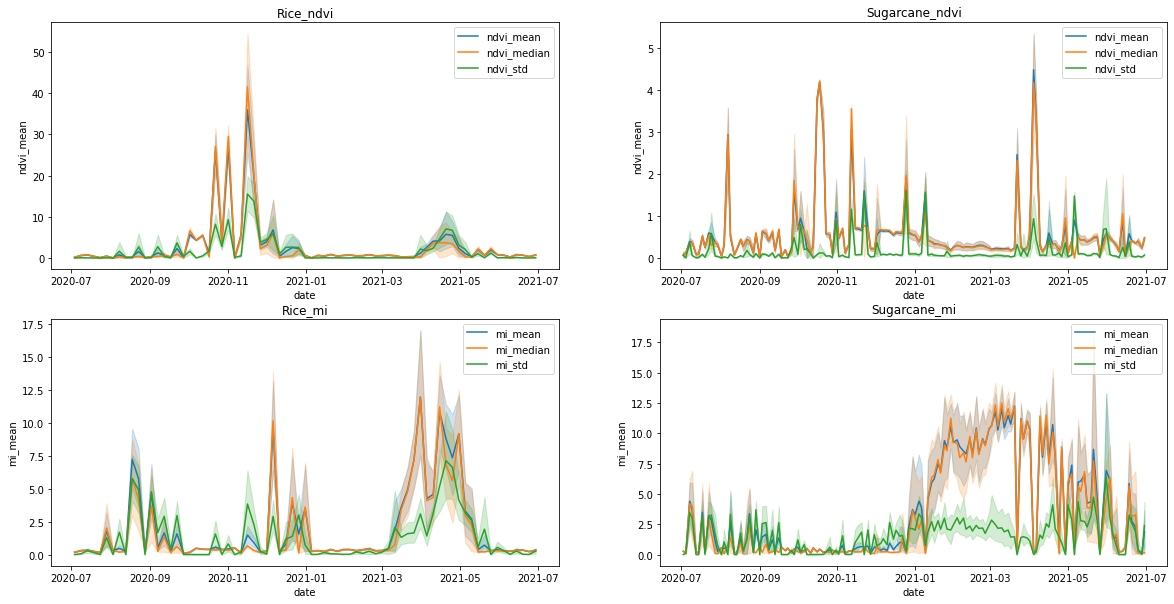

In [9]:
sugarcane = df_viz[df_viz['target']=='sugarcane']
rice = df_viz[df_viz['target']== 'rice_1y']

plt.figure(figsize=(20,10))

# Ndvi Visualization
# Rice
plt.subplot(2, 2, 1)
sns.lineplot(x = "date", y = "ndvi_mean", data = rice, palette = 'blue',label = 'ndvi_mean')
sns.lineplot(x = "date", y = "ndvi_median", data = rice,palette = 'orange',label = 'ndvi_median')
sns.lineplot(x = "date", y = "ndvi_std", data = rice,palette = 'green',label = 'ndvi_std')
plt.title('Rice_ndvi')
# Sugarcane
plt.subplot(2, 2, 2)
sns.lineplot(x = "date", y = "ndvi_mean", data = sugarcane, palette = 'blue',label = 'ndvi_mean')
sns.lineplot(x = "date", y = "ndvi_median", data = sugarcane,palette = 'orange',label = 'ndvi_median')
sns.lineplot(x = "date", y = "ndvi_std", data = sugarcane,palette = 'green',label = 'ndvi_std')
plt.title('Sugarcane_ndvi')

# mi Visualization
# Rice
plt.subplot(2, 2, 3)
sns.lineplot(x = "date", y = "mi_mean", data = rice, palette = 'blue',label = 'mi_mean')
sns.lineplot(x = "date", y = "mi_median", data = rice,palette = 'orange',label = 'mi_median')
sns.lineplot(x = "date", y = "mi_std", data = rice,palette = 'green',label = 'mi_std')
plt.title('Rice_mi')
# Sugarcane
plt.subplot(2, 2, 4)
sns.lineplot(x = "date", y = "mi_mean", data = sugarcane, palette = 'blue',label = 'mi_mean')
sns.lineplot(x = "date", y = "mi_median", data = sugarcane,palette = 'orange',label = 'mi_median')
sns.lineplot(x = "date", y = "mi_std", data = sugarcane,palette = 'green',label = 'mi_std')
plt.title('Sugarcane_mi')

# Cb1 Visualization

# sns.lineplot(x = "date", y = "Cb1_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = rice)
# sns.lineplot(x = "date", y = "Cb1_std", data = rice)

# sns.lineplot(x = "date", y = "Cb1_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb1_std", data = sugarcane)


# Cb2 Visualization

# sns.lineplot(x = "date", y = "Cb2_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = rice)
# sns.lineplot(x = "date", y = "Cb2_std", data = rice)

# sns.lineplot(x = "date", y = "Cb2_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb2_std", data = sugarcane)


# plt.ylabel("Col_1 and Col_2")
# plt.xticks(rotation = 25)
plt.legend()


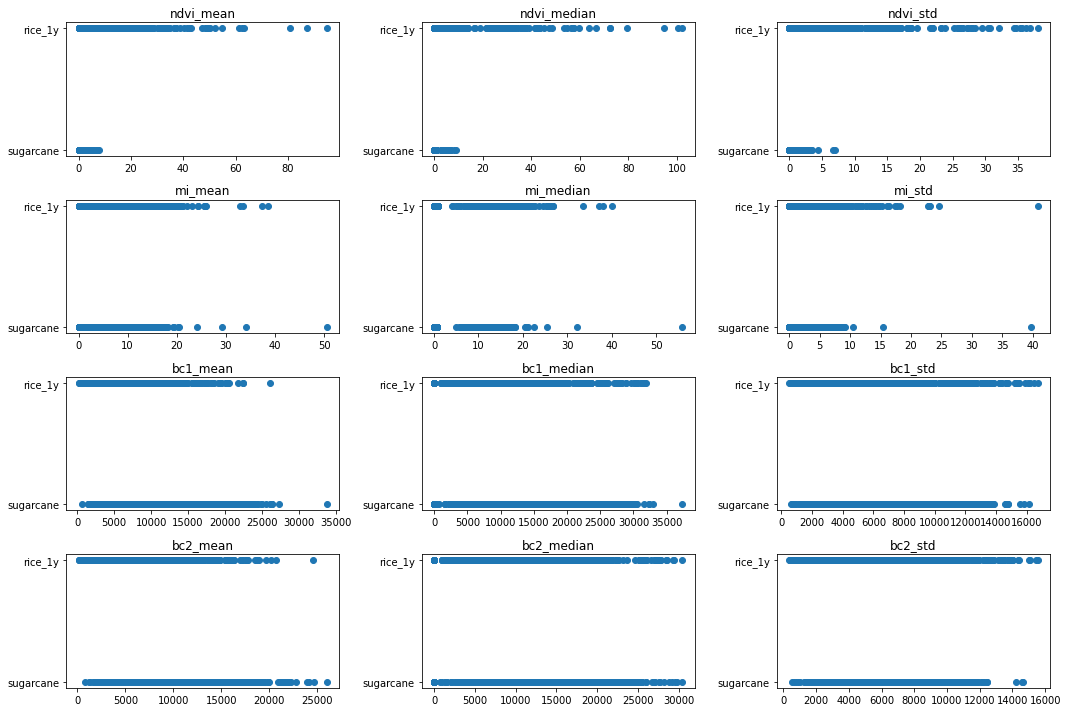

In [10]:
X = df_viz.drop(columns=['target','date','month','file_id'])
y = df_viz['target']

fig, ax = plt.subplots(4, 3, figsize=(15,10), tight_layout=True, )

#Ndvi
ax[0,0].scatter(X.ndvi_mean, y)
ax[0,0].set_title('ndvi_mean')
ax[0,1].scatter(X.ndvi_median, y)
ax[0,1].set_title('ndvi_median')
ax[0,2].scatter(X.ndvi_std, y)
ax[0,2].set_title('ndvi_std')

#mi
ax[1,0].scatter(X.mi_mean, y)
ax[1,0].set_title('mi_mean')
ax[1,1].scatter(X.mi_median, y)
ax[1,1].set_title('mi_median')
ax[1,2].scatter(X.mi_std, y)
ax[1,2].set_title('mi_std')

#Cb1
ax[2,0].scatter(X.bc1_mean, y)
ax[2,0].set_title('bc1_mean')
ax[2,1].scatter(X.bc1_median, y)
ax[2,1].set_title('bc1_median')
ax[2,2].scatter(X.bc1_std, y)
ax[2,2].set_title('bc1_std')

#Cb2
ax[3,0].scatter(X.bc2_mean, y)
ax[3,0].set_title('bc2_mean')
ax[3,1].scatter(X.bc2_median, y)
ax[3,1].set_title('bc2_median')
ax[3,2].scatter(X.bc2_std, y)
ax[3,2].set_title('bc2_std')

plt.show()

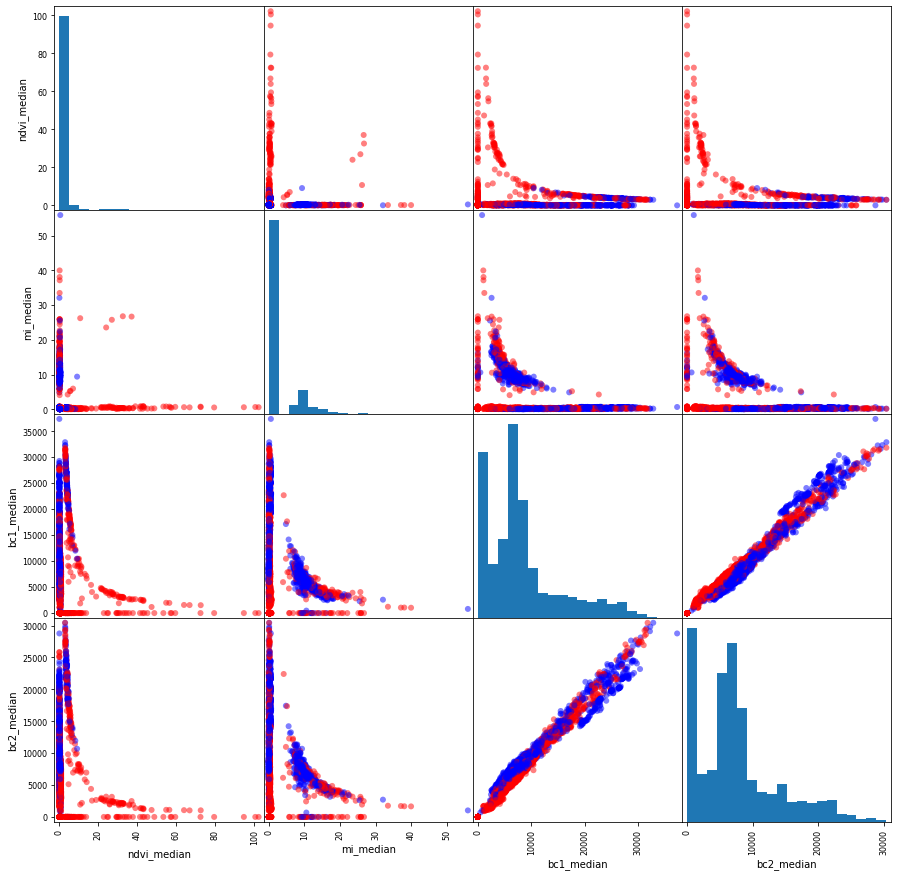

In [11]:
X = df_viz.drop(columns='target')
y = df_viz['target']
pd.plotting.scatter_matrix(X.iloc[:,[3,6,9,12]], alpha=0.5, color=['blue' if t == 'sugarcane' else 'red' for t in y], figsize=(15,15), marker='o', hist_kwds={'bins':20});

# Prevent Data Leaking (df2: ndvi, mi, bc1-bc3, band 1 ~12)

In [12]:
df2 = df.copy()
remove_columns = ['bc4_mean', 'bc4_median', 'bc4_std', 'bc5_mean',
       'bc5_median', 'bc5_std', 'bc6_mean', 'bc6_median', 'bc6_std',
       'bc8_mean', 'bc8_median', 'bc8_std', 'bc9_mean', 'bc9_median',
       'bc9_std', 'bc10_mean', 'bc10_median', 'bc10_std', 'bc11_mean',
       'bc11_median', 'bc11_std', 'bc12_mean', 'bc12_median', 'bc12_std',
       'bc13_mean', 'bc13_median', 'bc13_std', 'bc14_mean', 'bc14_median',
       'bc14_std', 'bc15_mean', 'bc15_median', 'bc15_std', 'bc16_mean',
       'bc16_median', 'bc16_std', 'bc17_mean', 'bc17_median', 'bc17_std']
df2 = df2.drop(columns = remove_columns )
df2

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
1661,2020-07-03,Name_5f2a5324868954001c94d201,sugarcane,0.250802,0.253114,0.014855,0.264690,0.266351,0.011328,5063.663810,...,3772.030476,0.0,4485.894054,1154.457143,0.0,1374.713478,889.934286,0.0,1059.201426,7
1651,2020-07-03,id_6054a1b558a7cd00480009b9,sugarcane,0.045984,0.045692,0.003819,0.283422,0.283140,0.003703,15624.181818,...,1220.886364,1465.0,553.602447,2960.727273,3568.0,1342.194876,1716.125000,2068.0,777.945543,7
1684,2020-07-03,id_6054a1b458a7cd00480009a1,sugarcane,0.051992,0.051309,0.005102,0.253422,0.253802,0.004671,13752.631687,...,1098.549383,1389.0,570.094574,2770.154321,3507.0,1436.938595,1679.954733,2120.0,871.491294,7
1751,2020-07-03,id_6054a1b458a7cd004800099b,sugarcane,0.066951,0.065891,0.007054,0.271170,0.270490,0.004760,13180.242424,...,1030.560606,1233.0,473.999780,2625.348485,3186.0,1207.604328,1564.287879,1904.0,719.816281,7
1679,2020-07-03,id_6054a1b558a7cd00480009d7,sugarcane,0.076495,0.033484,0.462855,0.304458,0.304456,0.005560,12461.900000,...,3700.795238,1584.0,5064.699268,2230.102857,3527.0,1799.318805,1361.360000,2036.0,1110.769679,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2021-06-30,id_6054a1b458a7cd004800099b,sugarcane,0.440827,0.461003,0.092351,0.126450,0.128659,0.044161,7713.303030,...,4947.174242,5949.0,2275.804771,2618.681818,3027.5,1227.776472,1947.916667,2265.0,934.167617,6
1537,2021-06-30,id_6054a1b558a7cd00480009d7,sugarcane,0.438477,0.449263,0.058814,3.513647,0.063961,4.848746,4479.320952,...,2181.831429,1514.0,2234.713163,1897.510476,2943.0,1535.442660,1295.976190,1925.0,1059.287537,6
1528,2021-06-30,id_6054a1b558a7cd00480009b9,sugarcane,0.513206,0.537832,0.083370,0.146012,0.155046,0.033941,6588.988636,...,4498.829545,5400.0,2040.409435,2211.022727,2648.5,1004.824589,1487.636364,1738.5,683.302828,6
1571,2021-06-30,id_6054a1b558a7cd00480009e9,sugarcane,0.399044,0.377174,0.086154,5.960522,0.183560,6.521667,4841.391667,...,1107.436905,1425.0,607.022327,1982.441667,2534.0,1088.129617,1396.050000,1770.0,768.990515,6


In [13]:
#GroupShuffleSplit
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(df2, groups=df2['file_id']))
train = df2.iloc[train_inds]
test = df2.iloc[test_inds]

In [14]:
A = train.file_id.unique()
B = test.file_id.unique()
bool(set(A).intersection(B))

False

# Learning Curve

In [15]:
X_train = train.drop(columns = ['target','month', 'date','file_id'])
y_train= train['target']

X_test = test.drop(columns = ['target','month', 'date','file_id'])
y_test = test['target']

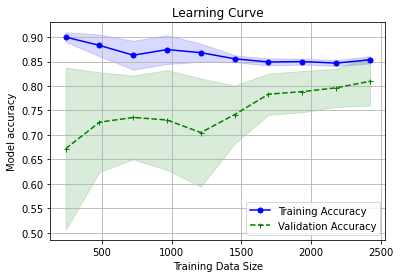

In [16]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))

# pipeline = make_pipeline(StandardScaler(),
#                         KNeighborsClassifier())

# Use learning curve to get training and test scores along with train sizes

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Train Model

In [17]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_all,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'X_train_all' is not defined

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sc = RobustScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

pca = PCA()
X_train_all = pca.fit_transform(X_train_sc)
X_test_all = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors=4, leaf_size = 1, p = 1)
knn.fit(X_train_all, y_train)

y_pred = knn.predict(X_test_all)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

In [ ]:
# Save model 
import joblib
# save the model to disk
filename ='knn_model.joblib'
joblib.dump(knn,filename)
print("saved model.joblib locally")

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_all, y_test)
print(result)

In [ ]:
X_train_all